In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [35]:
data = load_breast_cancer()
X, y = data.data, data.target

In [36]:
def plot_learning_curve(model, title, X, y, cv, ax):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    print(f"{title} - Training Scores: {train_mean}")
    print(f"{title} - Validation Scores: {val_mean}")

    ax.plot(train_sizes, train_mean, 'o-', color='blue', label="Training Score")
    ax.plot(train_sizes, val_mean, 'o-', color='orange', label="Validation Score")
    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy")
    ax.grid(True)
    ax.legend(loc="best")


In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [42]:
def plot_learning_curve(model, title, X, y, cv, ax):
    try:
        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), 
            scoring='accuracy', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)

        print(f"{title} - train_mean: {train_mean}")
        print(f"{title} - val_mean: {val_mean}")

        if np.any(np.isnan(train_mean)) or np.any(np.isnan(val_mean)):
            print(f"⚠️ Skipping {title} due to NaNs in results.")
            return

        ax.plot(train_sizes, train_mean, 'o-', color='blue', label="Training Score")
        ax.plot(train_sizes, val_mean, 'o-', color='orange', label="Validation Score")
        ax.set_title(title)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Accuracy")
        ax.grid(True)
        ax.legend(loc="best")
    except Exception as e:
        print(f"❌ Error plotting {title}: {e}")


LogisticRegression - train_mean: [0.98666667 0.99120879 0.98382353 0.98571429 0.98590308 0.98315018
 0.9836478  0.98516484 0.98826406 0.98813187]
LogisticRegression - val_mean: [0.85943177 0.94732184 0.95081509 0.96662009 0.96840553 0.96488123
 0.97014439 0.97189877 0.97366868 0.97366868]
DecisionTreeClassifier - train_mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
DecisionTreeClassifier - val_mean: [0.79796615 0.89111939 0.87700668 0.88577861 0.89810588 0.88927185
 0.89805931 0.91038659 0.9086322  0.91391088]
RandomForestClassifier - train_mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
RandomForestClassifier - val_mean: [0.83305387 0.90870983 0.93854991 0.9490607  0.94381307 0.952585
 0.96135693 0.95784816 0.95783263 0.96135693]


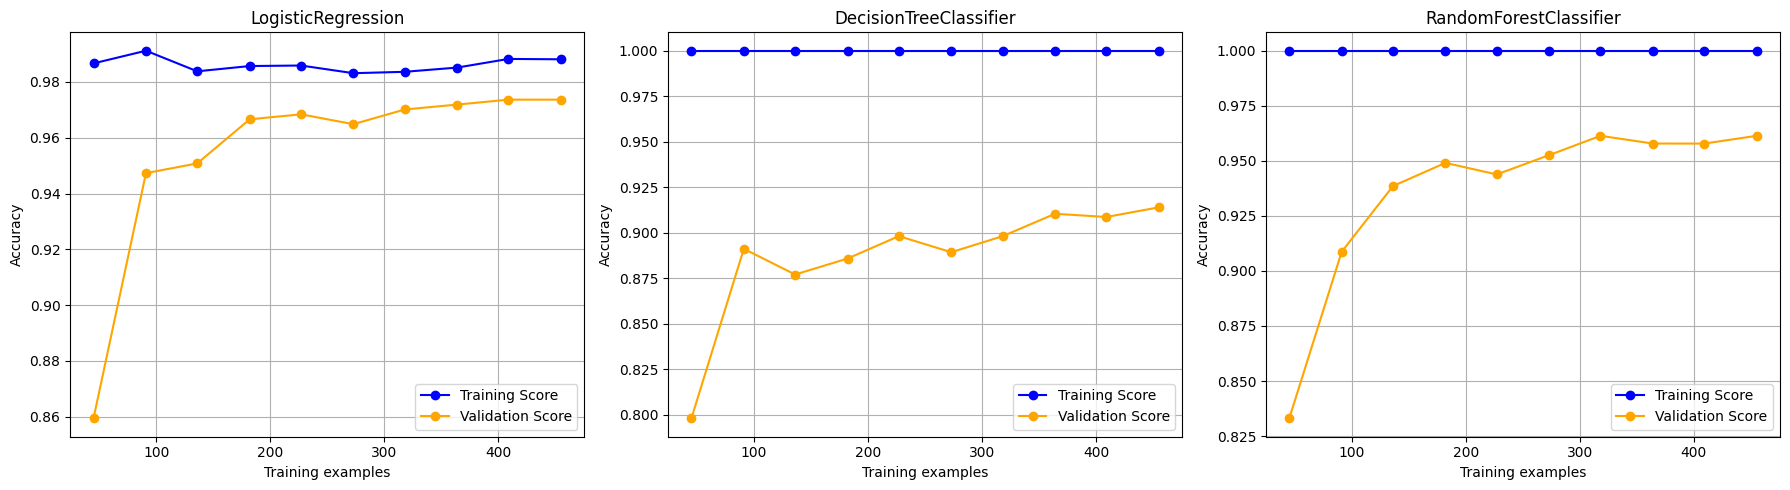

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    plot_learning_curve(model, name, X, y, cv, ax)

plt.tight_layout()
plt.show()